In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fn = "grab_pickup_ncr.csv"
df = pd.read_csv(fn)

In [19]:
df.head(2)

,X,Y,X.1,Y.1,source,created_at,pick_up_la,pick_up_lo,drop_off_l,drop_off_1,...,ISO_2,NAME_3,NL_NAME3,VARNAME3,TYPE_3,ENGTYPE3,PROVINCE_2,REGION_2,dt,month
0,120.98014,14.67869,120.98014,14.67869,IOS,2013-10-02 09:39:38.000000,14.67869,120.98014,14.58144,121.06073,...,PHL,Philippines,47,Metropolitan Manila,966,Valenzuela,NaN,"Valenzuela, City of",2013-10-02 09:39:38,10
1,120.96980,14.69428,120.96980,14.69428,IOS,2013-12-11 10:32:55.000000,14.69428,120.96980,14.60397,121.01748,...,PHL,Philippines,47,Metropolitan Manila,966,Valenzuela,NaN,"Valenzuela, City of",2013-12-11 10:32:55,12


In [4]:
len(df)

756

In [15]:
df["dt"] = pd.to_datetime(df["created_at"])

In [16]:
df["dt"].head(2)

0   2013-10-02 09:39:38
1   2013-12-11 10:32:55
Name: dt, dtype: datetime64[ns]

In [18]:
df["month"] = df["dt"].dt.month

In [25]:
df_count_by_month = pd.DataFrame(df["month"].value_counts())
df_count_by_month.reset_index(inplace=True)
df_count_by_month.columns = ["month", "count"]
df_count_by_month

,month,count
0,12,350
1,11,139
2,10,137
3,9,110
4,8,20


In [34]:
np.linspace(8,12,6)

array([  8. ,   8.8,   9.6,  10.4,  11.2,  12. ])

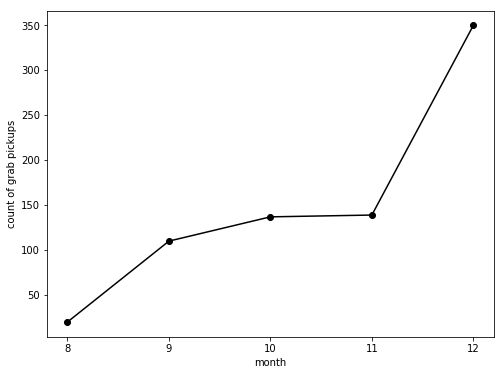

In [35]:
plt.figure(figsize=(8,6))
plt.plot(df_count_by_month["month"], df_count_by_month["count"], 'ko-')
plt.xlabel("month")
plt.ylabel("count of grab pickups")
plt.xticks((np.linspace(8,12,5)))
plt.savefig("fig_count_by_month.png", dpi=200)

In [5]:
df["NAME_2"].value_counts()

Valenzuela       529
Malabon          220
Kalookan City      5
Navotas            2
Name: NAME_2, dtype: int64

In [7]:
df.groupby("NAME_2")["NAME_2"].agg([len])

,len
NAME_2,
Kalookan City,5
Malabon,220
Navotas,2
Valenzuela,529


In [9]:
df.groupby(["NAME_2", "source"])["NAME_2"].agg([len])

len
NAME_2        source     
Kalookan City ADR       3
              IOS       2
Malabon       ADR      97
              IOS     122
              T47       1
Navotas       ADR       1
              IOS       1
Valenzuela    ADR     271
              IOS     256
              T47       2

In [12]:
df_mean = df.groupby(["NAME_2"])["X", "Y"].agg([np.mean])
df_mean

,X,Y
,mean,mean
NAME_2,,
Kalookan City,120.997804,14.669118
Malabon,120.970378,14.670976
Navotas,120.942010,14.667801
Valenzuela,120.980222,14.687616


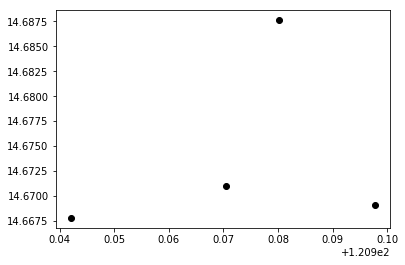

In [14]:
plt.plot(df_mean["X"], df_mean["Y"], 'ko')